# Import libraries

In [1]:
from skimage.io import imread
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.util import random_noise
import numpy as np
from numpy import pad
from scipy import signal
import matplotlib.pyplot as plt

# Helper functions

In [2]:
def plot_image(img,figsize=(5,5)):
    plt.figure(figsize=figsize)
    if len(img.shape)==2:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.show()
    print("Image shape: ", img.shape)

def plot_kernel(kernel, cmap="Reds"):
    plt.imshow(kernel, interpolation='none', cmap="Reds")
    plt.colorbar()
    plt.show()
    print("Kernel shape: ", kernel.shape)

#def gaussian_kernel(width=1, size=10):
#    gaussian1dkernel = signal.gaussian(size, width).reshape(size, 1)
#    kernel = np.outer(gaussian1dkernel, gaussian1dkernel)
#    return kernel/np.sum(kernel)


def gaussian_kernel(width=1, size=10):
    x = np.linspace(-size // 2, size // 2, size)
    gaussian1dkernel = np.exp(-0.5 * (x / width)**2)
    gaussian1dkernel /= np.sum(gaussian1dkernel)
    kernel = np.outer(gaussian1dkernel, gaussian1dkernel)
    return kernel / np.sum(kernel)

def box_kernel(size=5):
    return np.ones((size, size))/size**2

In [3]:
img = img_as_float(imread("/content/kayak.jpg"))
print("Image shape:", img.shape)
print("Max pixel value:", img.max()) #check if properly normalized

Image shape: (1448, 1448, 3)
Max pixel value: 1.0


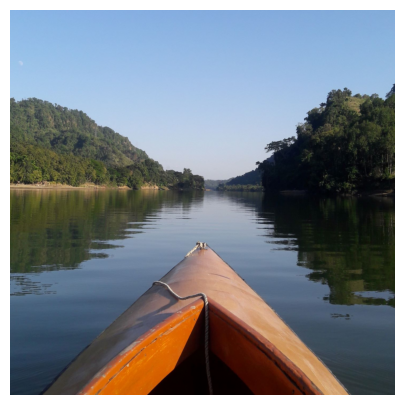

Image shape:  (1448, 1448, 3)


In [4]:
plot_image(img)

# Padding

In [5]:
pad_width = 200

In [6]:
A = np.array([1,2,3,4,5])
np.pad(A, (2, 3), 'constant')

array([0, 0, 1, 2, 3, 4, 5, 0, 0, 0])

In [11]:
img_white_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=1)
img_zero_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=0)
img_constant_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=0.8)
img_edge_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="edge")
img_mirror_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="reflect")
img_linear_ramp_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="linear_ramp")

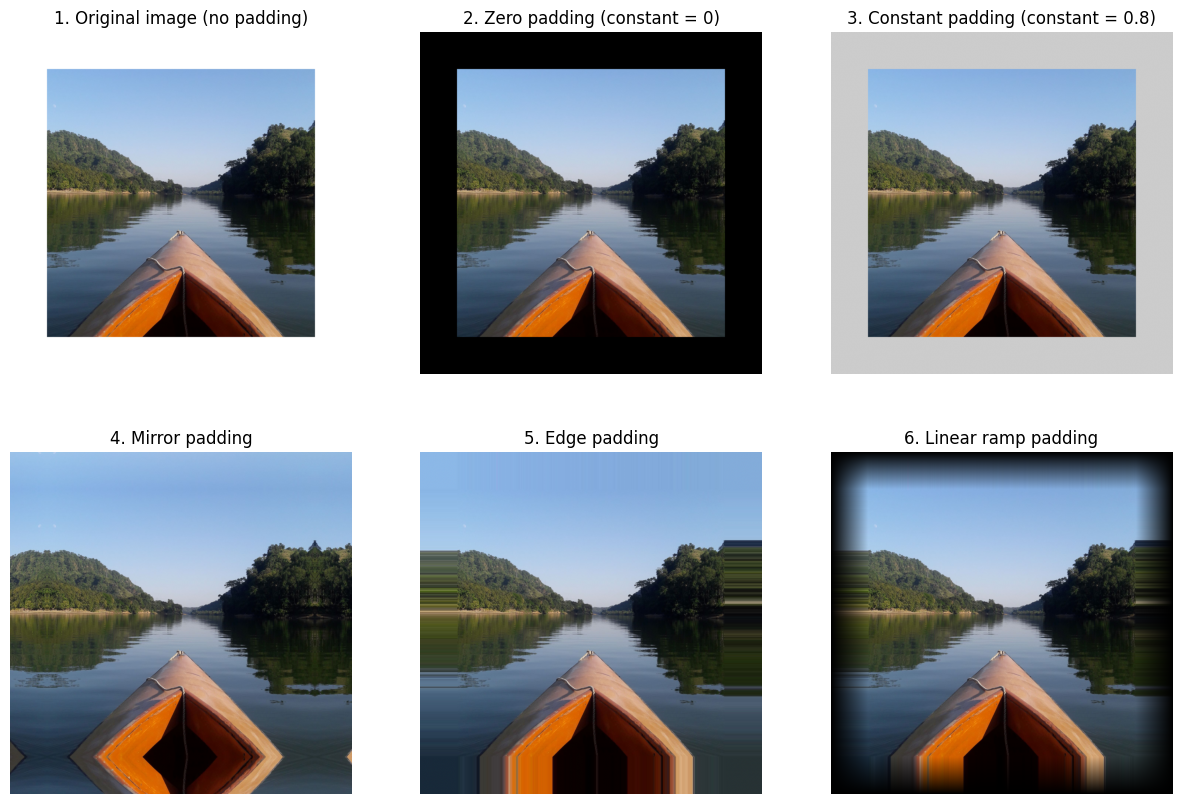

In [13]:
#Multiple plots using pyplot
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2,3,1)
ax1.imshow(img_white_padded)
# referring white_padded as original to show all the images in the same scale,
# might not work if your notebook background is not white! :P
ax1.title.set_text('1. Original image (no padding)')
ax1.axis("off")

ax2 = fig.add_subplot(2,3,2)
ax2.imshow(img_zero_padded)
ax2.title.set_text('2. Zero padding (constant = 0)')
ax2.axis("off")

ax3 = fig.add_subplot(2,3,3)
ax3.imshow(img_constant_padded)
ax3.title.set_text('3. Constant padding (constant = 0.8)')
ax3.axis("off")

ax4 = fig.add_subplot(2,3,4)
ax4.imshow(img_mirror_padded)
ax4.title.set_text('4. Mirror padding')
ax4.axis("off")

ax5 = fig.add_subplot(2,3,5)
ax5.imshow(img_edge_padded)
ax5.title.set_text('5. Edge padding')
ax5.axis("off")

ax6 = fig.add_subplot(2,3,6)
ax6.imshow(img_linear_ramp_padded)
ax6.title.set_text('6. Linear ramp padding')
ax6.axis("off")

plt.show()

# Linear filtering

## *grayscale* image

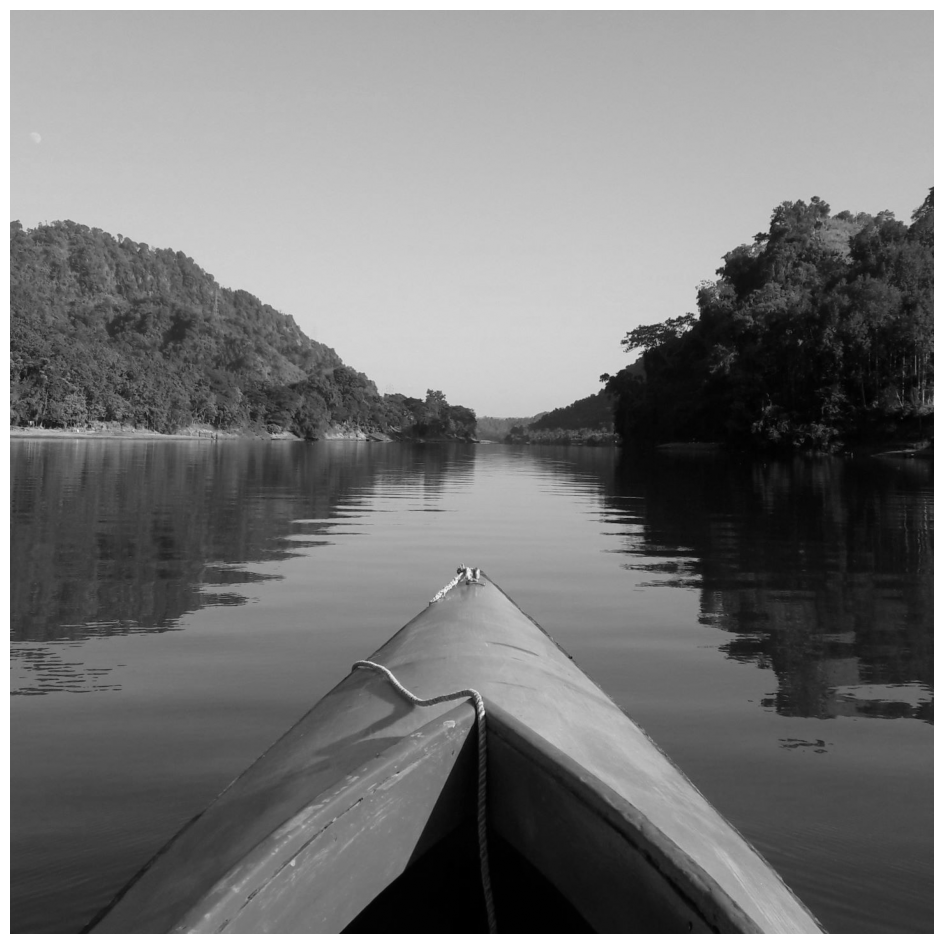

Image shape:  (1448, 1448)


In [29]:
## IMPORT & PLOT IMAGE

img = rgb2gray(imread("/content/kayak.jpg"))
plot_image(img, (12,12))

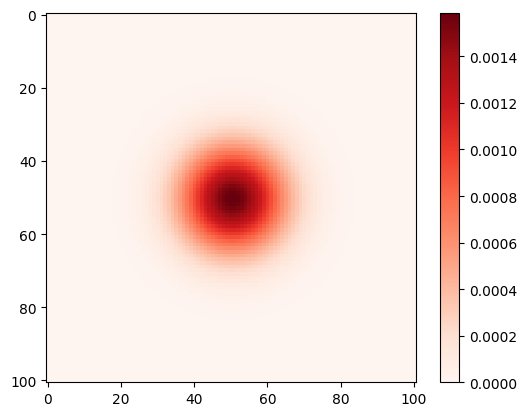

Kernel shape:  (101, 101)


In [34]:
## DEFINE & PLOT KERNEL

# kernel shape (k, k). k should be odd
k = 101

# spread for gaussian, spread > 1
spread = k/10 # or define manually

# calculate pad width from (k-1) / 2
pad_width = int((k-1)/2)

# define either a box kernel or a gaussian kernel by calling the pre defined functions
kernel = gaussian_kernel(spread, size=k)
# kernel = box_kernel(size=k)
plot_kernel(kernel)

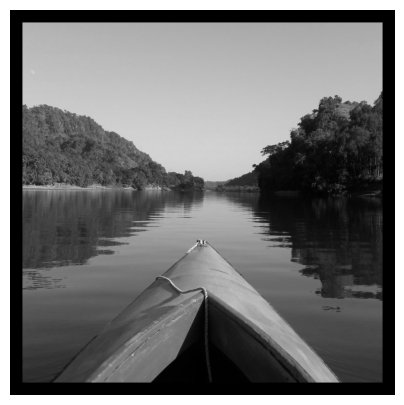

Image shape:  (1548, 1548)


In [35]:
# pad image
img_zero_padded = pad(img, pad_width=pad_width, mode="constant", constant_values=0)

plot_image(img_zero_padded)

In [36]:
# filter img with kernel via correlation
img_filtered = signal.correlate(img, kernel, mode='same', method='auto') # experiment with method="direct"

# plot_image(img_filtered)

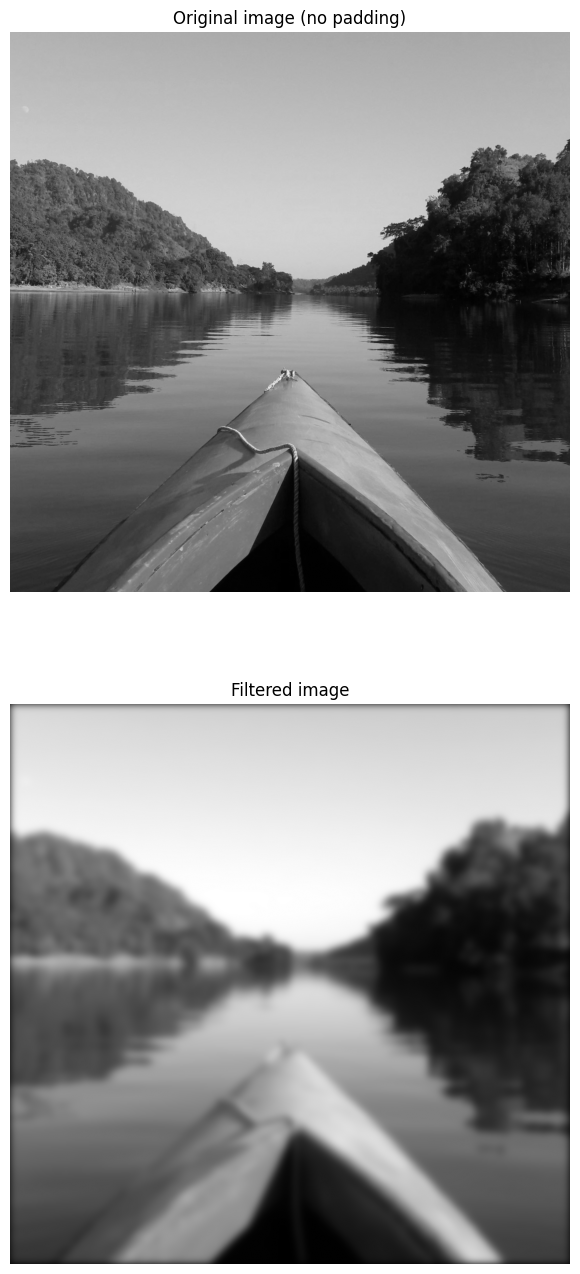

In [37]:
#Multiple plots using pyplot
fig = plt.figure(figsize=(8, 16))

ax1 = fig.add_subplot(2,1,1)
ax1.imshow(img, cmap="gray")
ax1.title.set_text('Original image (no padding)')
ax1.axis("off")

ax2 = fig.add_subplot(2,1,2)
ax2.imshow(img_filtered, cmap="gray")
ax2.title.set_text('Filtered image')
ax2.axis("off")

plt.show()

## *color* image

In [38]:
img = imread("/content/kayak.jpg")
# plot_image(img)

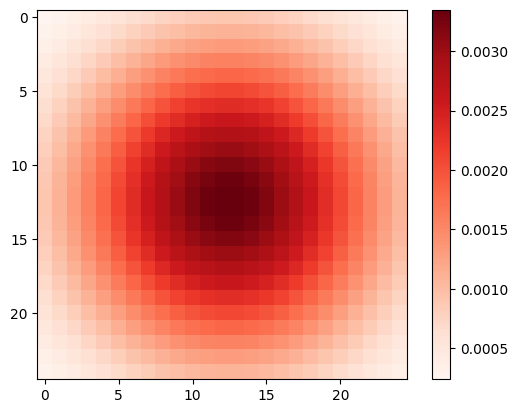

Kernel shape:  (25, 25)


In [39]:
# kernel shape (k, k). k should be odd
k = 25

# spread for gaussian, spread > 1
spread = 8 # or define manually

# calculate pad width from (k-1) / 2
pad_width = int((k-1)/2)

# define kernel
kernel = gaussian_kernel(spread, size=k)
# kernel = box_kernel(size=k)
plot_kernel(kernel)

In [40]:
# pad image

# img_zero_padded = pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=0)
# plot_image(img_zero_padded)

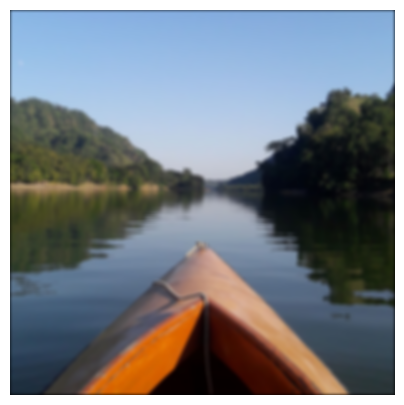

Image shape:  (1448, 1448, 3)


In [41]:
# filter img with kernel via correlation
img_filtered = np.zeros_like(img)

for i in range(img.shape[-1]):
  img_filtered[:,:,i] = signal.correlate(img[:,:,i], kernel, mode='same', method='auto') # experiment with method="direct", took 4m40s for me
plot_image(img_filtered)

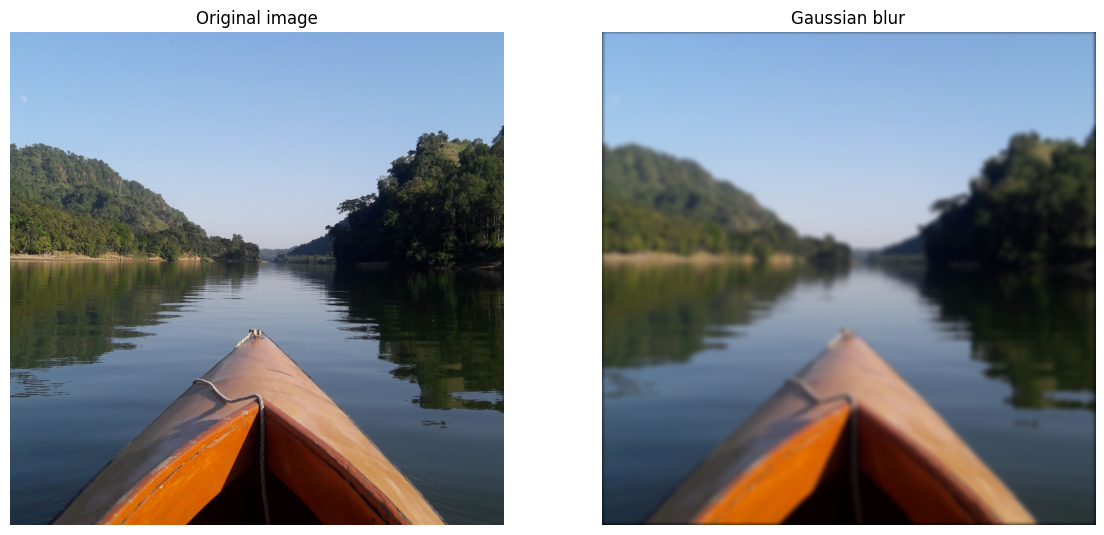

In [42]:
#Multiple plots using pyplot
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap="gray")
ax1.title.set_text('Original image')
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_filtered, cmap="gray")
ax2.title.set_text('Gaussian blur')
ax2.axis("off")

plt.show()

## Effect of increasing the kernel size

In [43]:
k_all = [5, 55, 205]

filtered_img_all_box = np.stack((np.zeros_like(img),)*len(k_all), axis=-1)

spread = 9

for i, k_unique in enumerate(k_all):
  # kernel = gaussian_kernel(spread, size=k_unique)
  kernel = box_kernel(size=k_unique)
  for j in range(img.shape[-1]):
    filtered_img_all_box[:,:,j, i] = signal.correlate(img[:,:,j], kernel, mode='same', method='auto')

filtered_img_all_gaussian = np.stack((np.zeros_like(img),)*len(k_all), axis=-1)

for i, k_unique in enumerate(k_all):
  kernel = gaussian_kernel(spread, size=k_unique)
  # kernel = box_kernel(size=k_unique)
  for j in range(img.shape[-1]):
    filtered_img_all_gaussian[:,:,j, i] = signal.correlate(img[:,:,j], kernel, mode='same', method='auto')

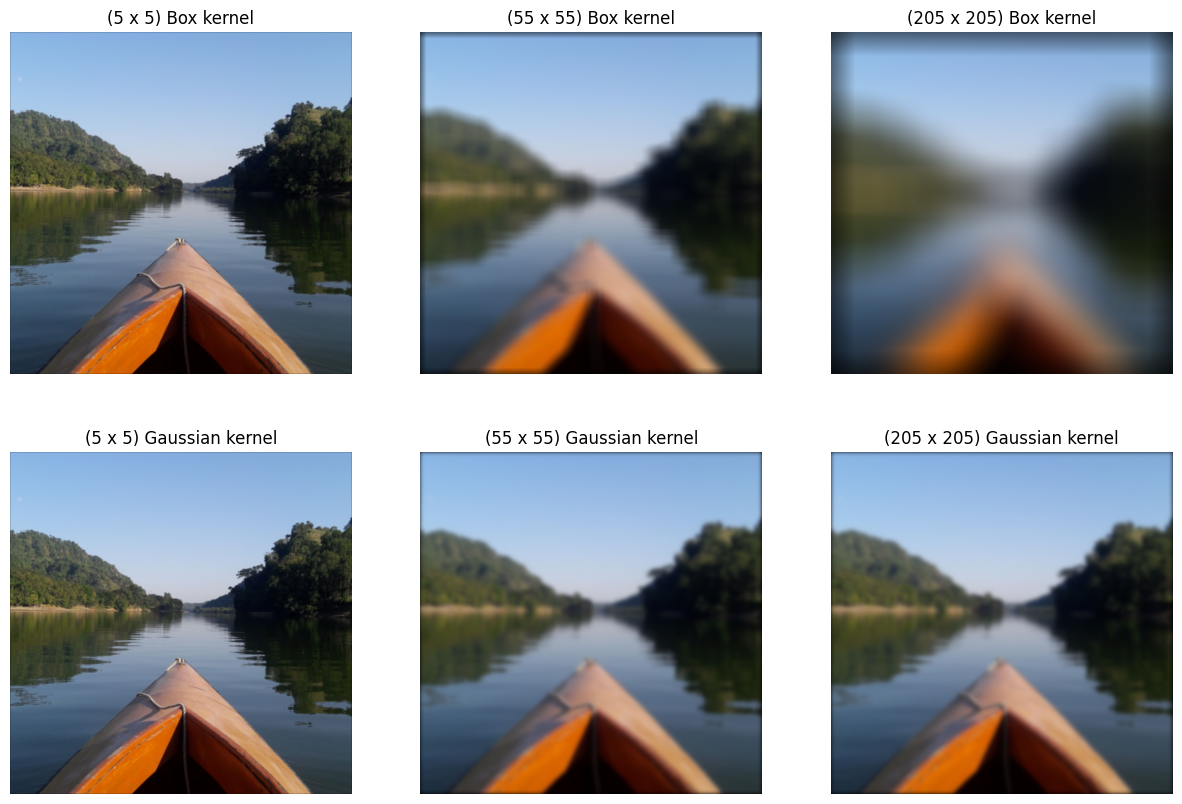

In [45]:
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2,3,1)
ax1.imshow(filtered_img_all_box[:,:,:,0])
ax1.title.set_text('(5 x 5) Box kernel')
ax1.axis("off")

ax2 = fig.add_subplot(2,3,2)
ax2.imshow(filtered_img_all_box[:,:,:,1])
ax2.title.set_text('(55 x 55) Box kernel')
ax2.axis("off")

ax3 = fig.add_subplot(2,3,3)
ax3.imshow(filtered_img_all_box[:,:,:,2])
ax3.title.set_text('(205 x 205) Box kernel')
ax3.axis("off")

ax4 = fig.add_subplot(2,3,4)
ax4.imshow(filtered_img_all_gaussian[:,:,:,0])
ax4.title.set_text('(5 x 5) Gaussian kernel')
ax4.axis("off")

ax5 = fig.add_subplot(2,3,5)
ax5.imshow(filtered_img_all_gaussian[:,:,:,1])
ax5.title.set_text('(55 x 55) Gaussian kernel')
ax5.axis("off")

ax6 = fig.add_subplot(2,3,6)
ax6.imshow(filtered_img_all_gaussian[:,:,:,2])
ax6.title.set_text('(205 x 205) Gaussian kernel')
ax6.axis("off")

plt.show()

# De-noising

In [46]:
img = img_as_float(imread("/content/kayak.jpg"))
plot_image(img, figsize=(20,20))

Output hidden; open in https://colab.research.google.com to view.

In [47]:
noisy_image_gaussian = random_noise(img, mode='gaussian', var=0.01)
plot_image(noisy_image_gaussian, figsize=(20,20))

Output hidden; open in https://colab.research.google.com to view.

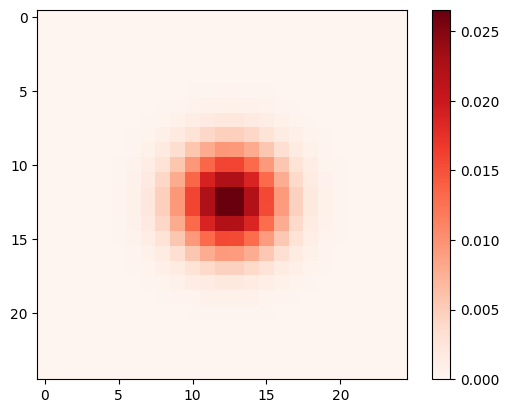

Kernel shape:  (25, 25)


In [48]:
# define kernel
# kernel shape (k, k). k should be odd
k = 25

# spread for gaussian, spread > 1
spread = k/10
kernel = gaussian_kernel(spread, size=k)
# kernel = box_kernel(size=k)
plot_kernel(kernel)

In [49]:
img_filtered = np.zeros_like(img)

for i in range(img.shape[-1]):
  img_filtered[:,:,i] = signal.correlate(noisy_image_gaussian[:,:,i], kernel, mode='same', method='auto')

plot_image(img_filtered, figsize=(20,20))

Output hidden; open in https://colab.research.google.com to view.

In [50]:
# salt-and-pepper noise can be applied only to greyscale images
# Reading the color image in greyscale image
img_gray = rgb2gray(imread("/content/kayak.jpg"))

noisy_image_sp = random_noise(img_gray, mode='s&p')

#Storing the image
plot_image(noisy_image_sp, figsize=(20,20))

Output hidden; open in https://colab.research.google.com to view.

In [51]:
# plot_image(img_gray, figsize=(20,20))

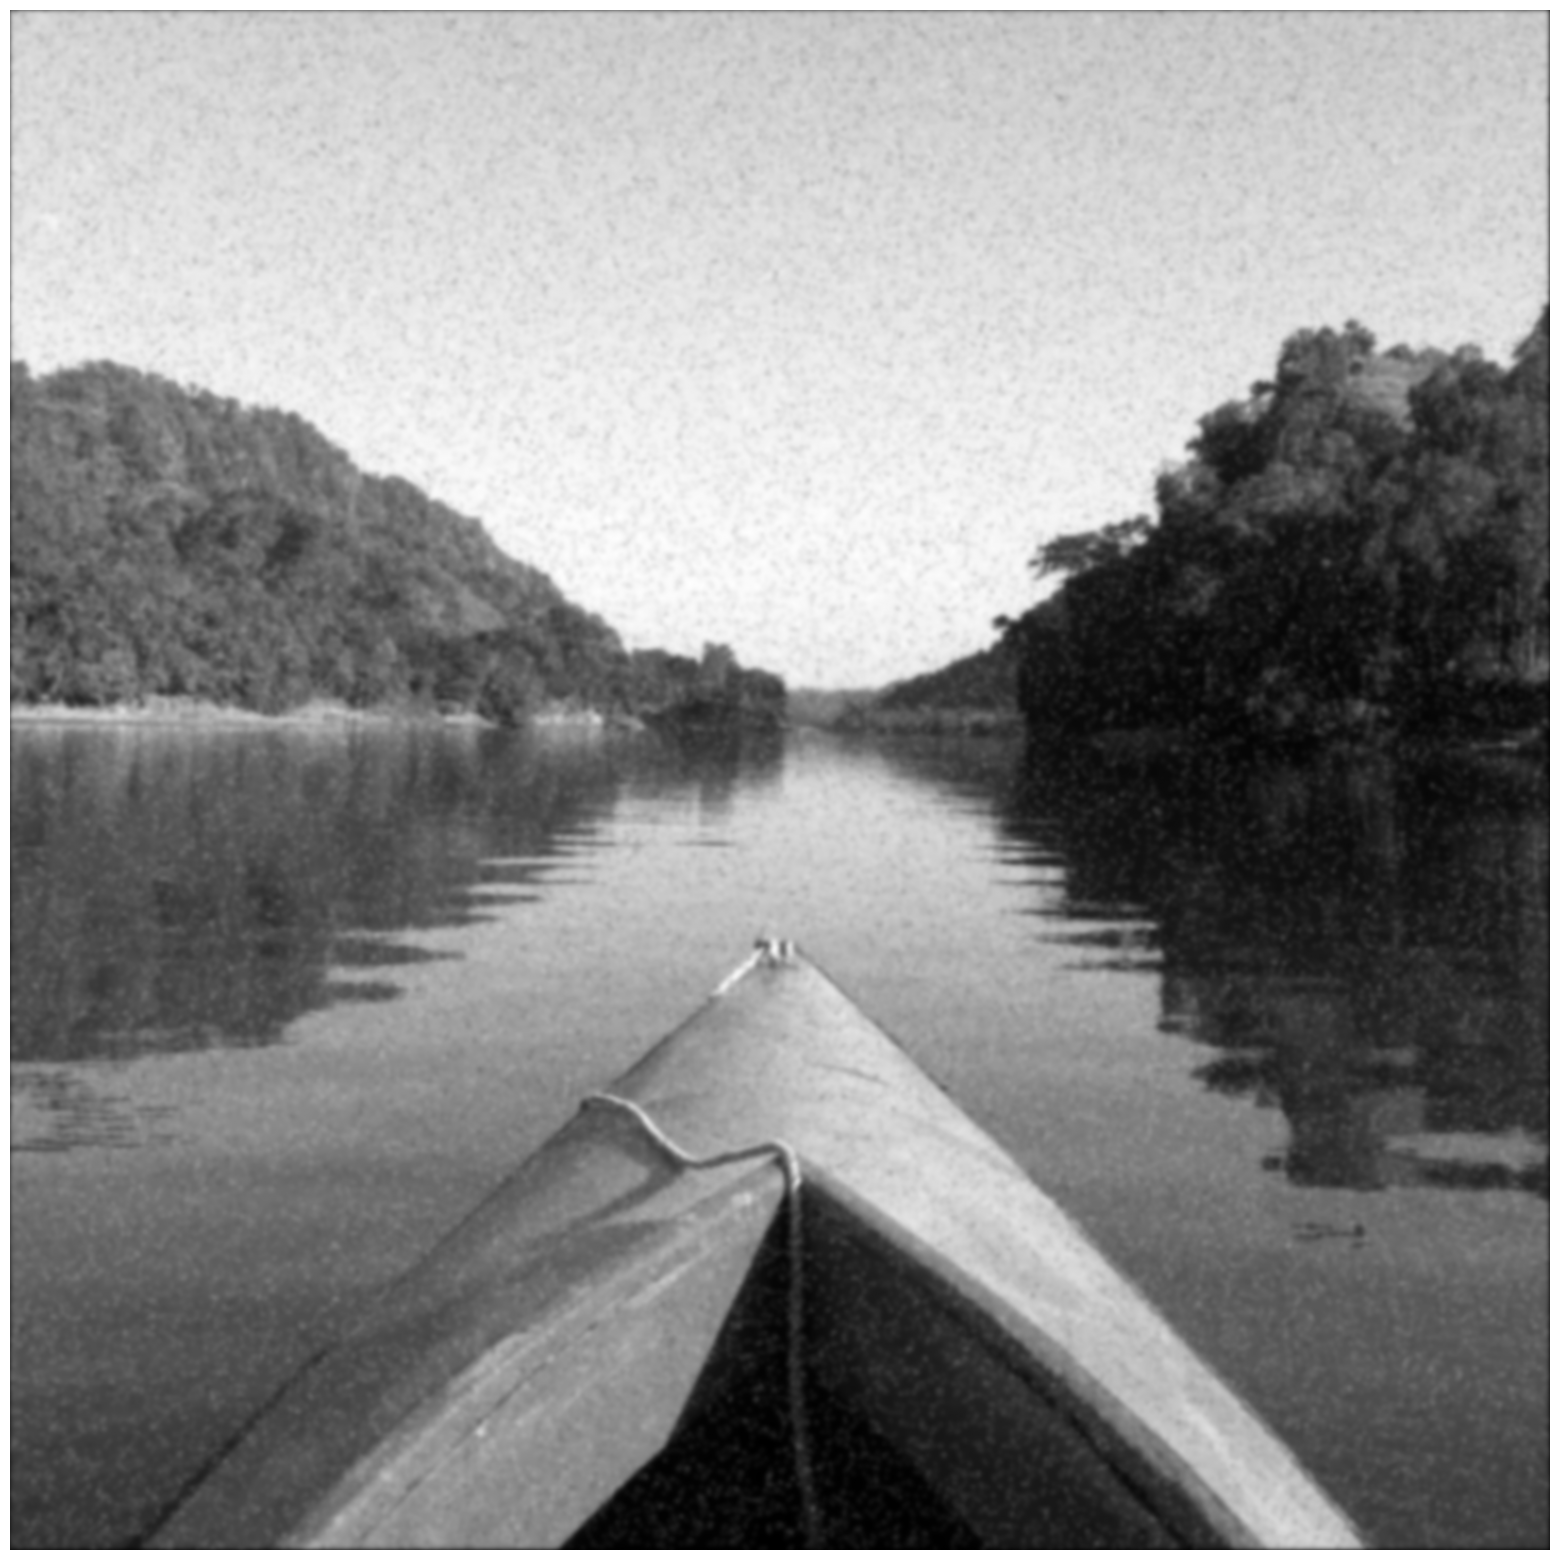

Image shape:  (1448, 1448)


In [52]:
img_filtered = signal.correlate(noisy_image_sp, kernel, mode='same', method='auto')

plot_image(img_filtered, figsize=(20,20))

In [53]:
from skimage.filters import median
from skimage.morphology import disk

# Define a structuring element (neighborhood shape) for the median filter
footprint = disk(1)  # Disk-shaped neighborhood with radius 1

# Apply the median filter
img_filtered_median = median(noisy_image_sp, footprint=footprint, mode='nearest', cval=0.0)


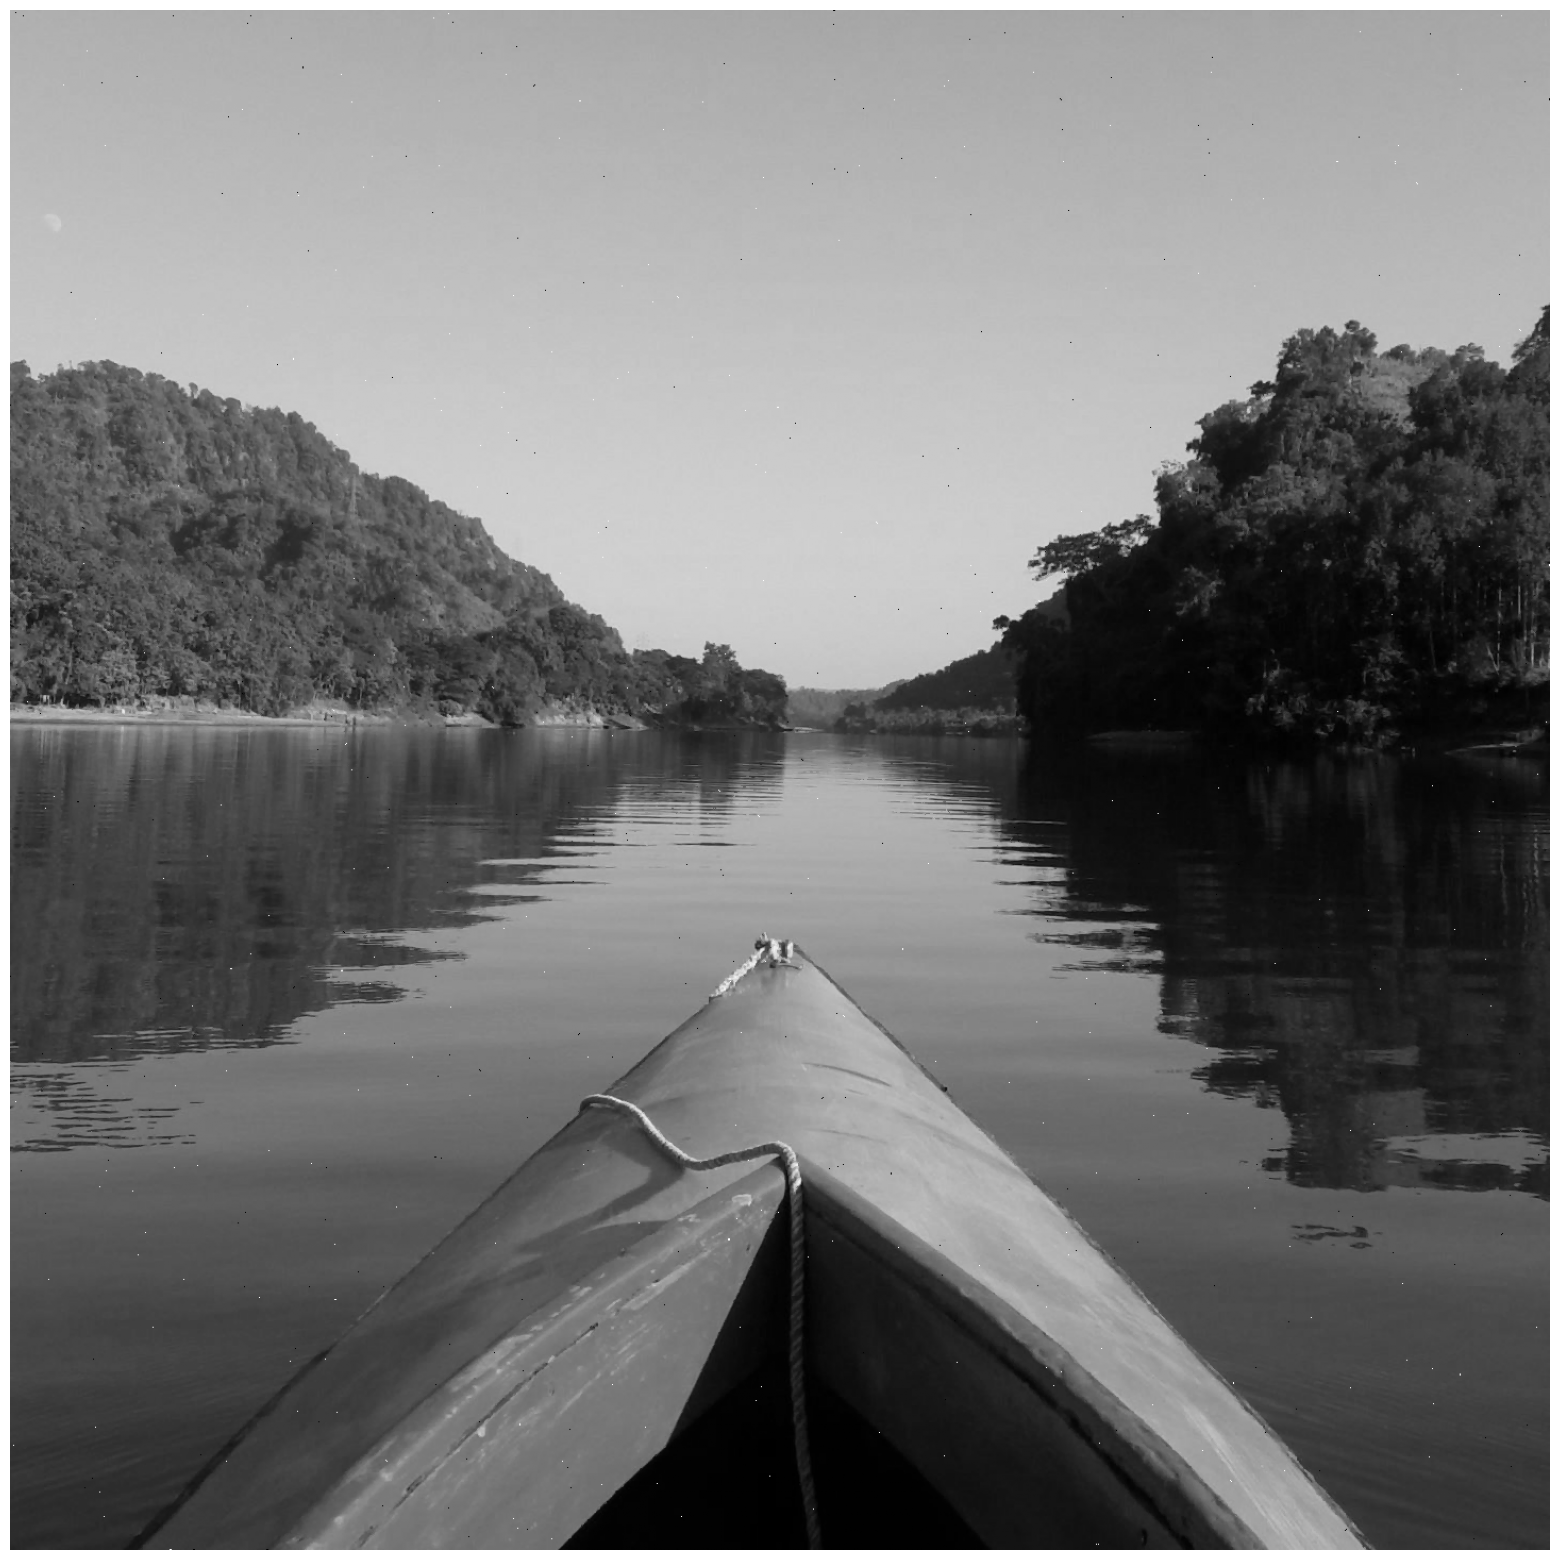

Image shape:  (1448, 1448)


In [54]:
plot_image(img_filtered_median, figsize=(20,20))

# Unsharp masking

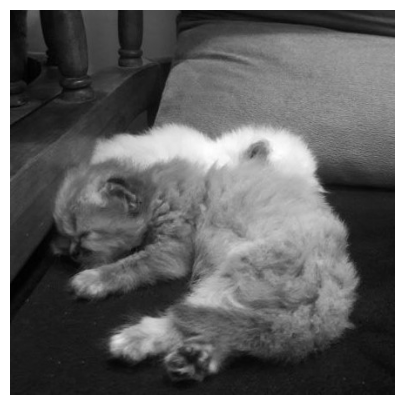

Image shape:  (443, 442)


In [78]:
blurry_text = rgb2gray(imread("/content/cat.jpg"))
plot_image(blurry_text)

In [79]:
# define kernel
# kernel shape (k, k). k should be odd
k = 75
# spread for gaussian, spread > 1
spread = 20
kernel = gaussian_kernel(spread, size=k)
# kernel = box_kernel(size=k)
# plot_kernel(kernel)

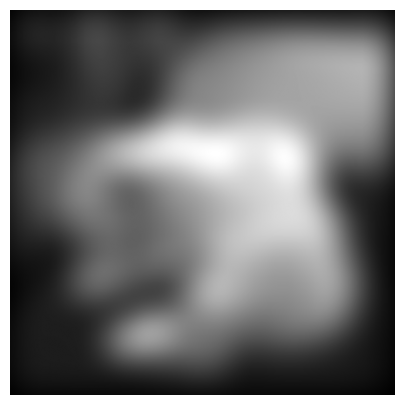

Image shape:  (443, 442)


In [80]:
blurry_text_filtered = signal.correlate(blurry_text, kernel, mode='same', method='auto')

plot_image(blurry_text_filtered)

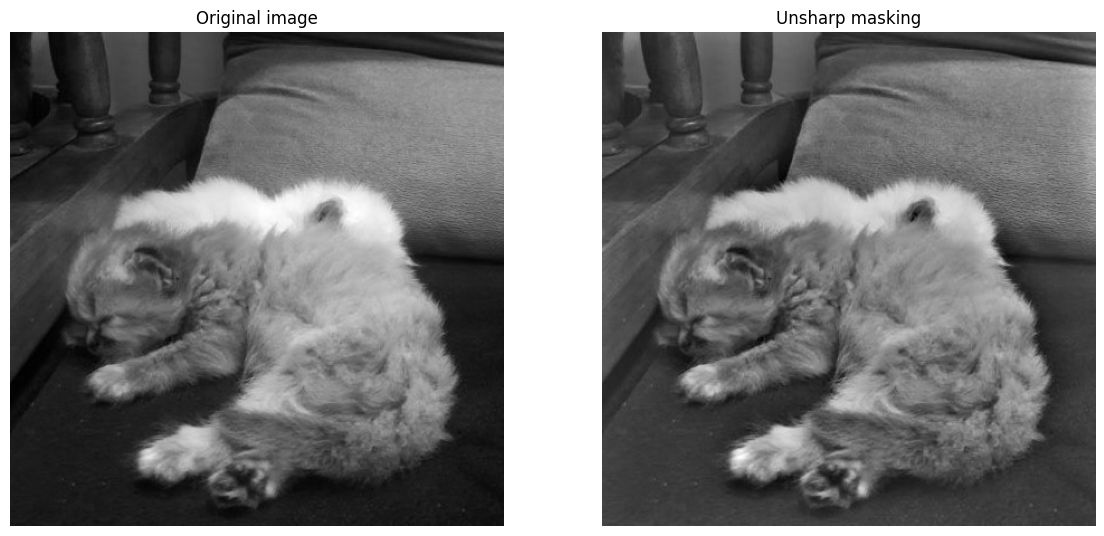

In [81]:
K = 1

#Multiple plots using pyplot
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(blurry_text, cmap="gray")
ax1.title.set_text('Original image')
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(blurry_text+K*(blurry_text-blurry_text_filtered), cmap="gray")
ax2.title.set_text('Unsharp masking')
ax2.axis("off")

plt.show()

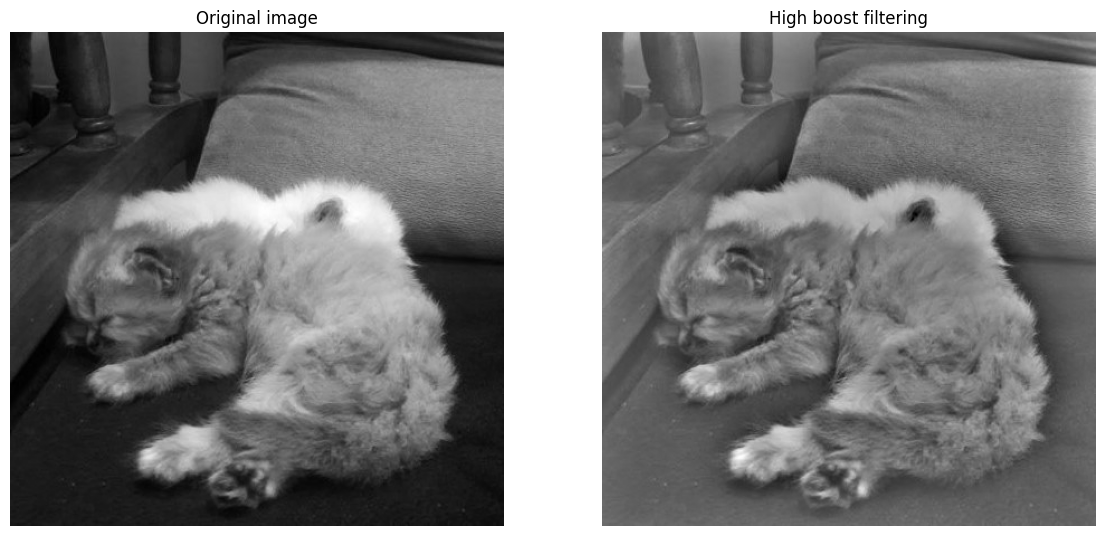

In [82]:
K = 3.5

#Multiple plots using pyplot
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(blurry_text, cmap="gray")
ax1.title.set_text('Original image')
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(blurry_text+K*(blurry_text-blurry_text_filtered), cmap="gray")
ax2.title.set_text('High boost filtering')
ax2.axis("off")

plt.show()